In [70]:
import pandas as pd
from pycaret.classification import *
# from sklearn.model_selection import KFold

# Prepare data set

In [71]:
numeric_features = ['pp_turnover',
 'pp_ career_rel',
 'pp_ career_etc',
 'pp_ career_max',
 'pp_ career_hm',
 'pp_turnover_self',
 'pp_turnover_other',
 'pp_relation_family',
#  'pp_appointment',
 'pp_appointment_a',
 'pp_appointment_b',
 'pp_appointment_c',
 'pp_appointment_d',
 'pp_appointment_e',
 'pp_appointment_f',
 'pp_ certificate',
 'pp_ certificate_rel',
 'pp_ certificate_etc',
 'pp_age_join',
 'pp_club']

dict_round = {}
for column in numeric_features:
    dict_round[column] = 0

In [72]:
df_alpha = pd.read_csv(r'../data_alpha.csv', encoding='utf-8')
df_alpha.drop(['Unnamed: 0'], axis='columns', inplace=True)    
display(df_alpha)

print(df_alpha['pp_longevity_10y'].value_counts())

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,executives,regular,graduate,M,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,salary_field,regular,production,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,hourly_field,regular,white_collar,regular,bachelor,M,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1234,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1235,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1236,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


0    1143
1      95
Name: pp_longevity_10y, dtype: int64


In [73]:
train_set = df_alpha.sample(frac=0.9, random_state=123)
print(train_set['pp_longevity_10y'].value_counts())
# df_0_sample = df_0.sample(n=1132, random_state=123)
# print(df_train.index)
test_set = df_alpha.drop(train_set.index)
print(test_set['pp_longevity_10y'].value_counts())

0    1031
1      83
Name: pp_longevity_10y, dtype: int64
0    112
1     12
Name: pp_longevity_10y, dtype: int64


In [74]:
df_syn = pd.read_csv(r'./data_syn.csv', encoding='utf-8')
df_syn.drop(['Unnamed: 0', 'pp_appointment'], axis='columns', inplace=True)    
df_syn = df_syn.round(dict_round)

train_1 = train_set.loc[train_set['pp_longevity_10y'] == 1]
syn_1 = df_syn.loc[df_syn['pp_longevity_10y'] == 1]

syn_sample = syn_1.sample(n=train_set['pp_longevity_10y'].value_counts()[0]-train_set['pp_longevity_10y'].value_counts()[1],
                                random_state=123)
train_bal_ctgan = pd.concat([train_set, syn_sample])   
print(train_bal_ctgan['pp_longevity_10y'].value_counts())
print(train_set['pp_longevity_10y'].value_counts())


1    1031
0    1031
Name: pp_longevity_10y, dtype: int64
0    1031
1      83
Name: pp_longevity_10y, dtype: int64


# Model from imbalanced data

In [12]:
exp_imbal = setup(data = train_set, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1114, 60)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
model_lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9872,0.9918,0.8000,1.0000,0.8889,0.8822,0.8884
1,0.9744,0.9954,0.6667,1.0000,0.8000,0.7869,0.8054
2,0.9872,1.0000,0.8333,1.0000,0.9091,0.9023,0.9066
3,0.9744,0.9792,0.8333,0.8333,0.8333,0.8194,0.8194
4,0.9744,1.0000,0.6667,1.0000,0.8000,0.7869,0.8054
5,0.9744,0.9838,0.6667,1.0000,0.8000,0.7869,0.8054
6,0.9615,0.9514,0.5000,1.0000,0.6667,0.6486,0.6928
7,0.9615,0.9931,0.6667,0.8000,0.7273,0.7068,0.7102
8,0.9744,0.9954,0.6667,1.0000,0.8000,0.7869,0.8054
9,0.9740,0.8944,0.8000,0.8000,0.8000,0.7861,0.7861


In [14]:
evaluate_model(model_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

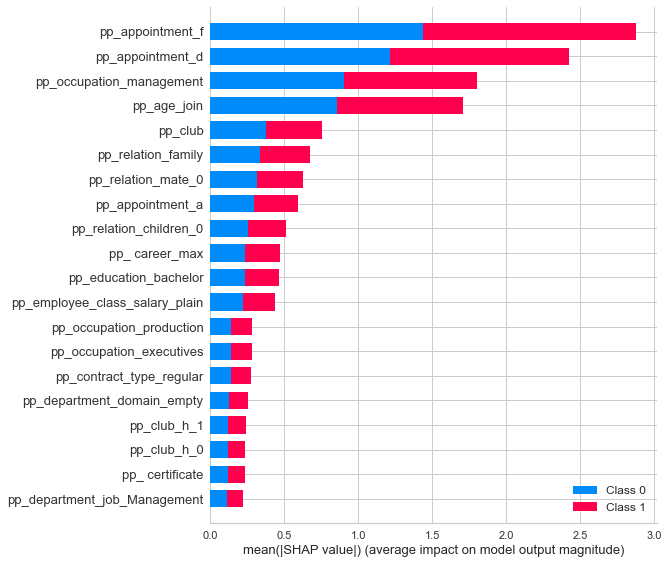

In [15]:
interpret_model(model_lgbm)

In [16]:
interpret_model(model_lgbm, plot = 'reason', observation = 10)

# Model from balanced data by CTGAN

In [17]:
exp_bal = setup(data = train_bal_ctgan, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2062, 60)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
model_lgbm_ctgan = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9655,0.9901,0.9306,1.0000,0.9640,0.9310,0.9332
1,0.9655,0.9901,0.9589,0.9722,0.9655,0.9310,0.9311
2,0.9586,0.9945,0.9452,0.9718,0.9583,0.9173,0.9176
3,0.9583,0.9938,0.9306,0.9853,0.9571,0.9167,0.9181
4,0.9514,0.9905,0.9583,0.9452,0.9517,0.9028,0.9029
5,0.9444,0.9855,0.9306,0.9571,0.9437,0.8889,0.8892
6,0.9514,0.9917,0.9167,0.9851,0.9496,0.9028,0.9050
7,0.9583,0.9892,0.9444,0.9714,0.9577,0.9167,0.9170
8,0.9653,0.9979,0.9444,0.9855,0.9645,0.9306,0.9314
9,0.9444,0.9944,0.9028,0.9848,0.9420,0.8889,0.8920


In [19]:
evaluate_model(model_lgbm_ctgan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

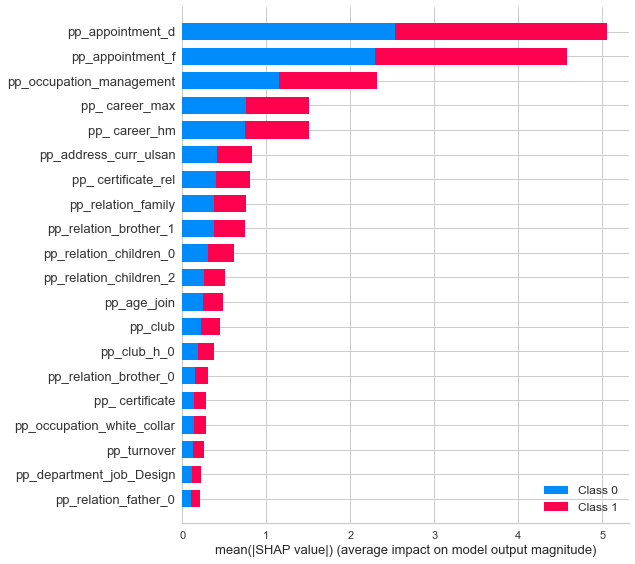

In [20]:
interpret_model(model_lgbm_ctgan)

In [21]:
interpret_model(model_lgbm_ctgan, plot = 'reason', observation = 10)

# First prediction

In [24]:
test_label = test_set.copy()
test_set = test_set.drop('pp_longevity_10y', axis = 1)


lgbm_imbal_final = finalize_model(model_lgbm)
lgbm_bal_final = finalize_model(model_lgbm_ctgan)

predictions_imbal = predict_model(lgbm_imbal_final, data = test_set)
predictions_bal = predict_model(lgbm_bal_final, data = test_set)

In [39]:
display(test_label)
display(predictions_imbal)
display(predictions_bal)

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
2,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
8,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
16,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,0,1,0,0,0,1
17,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1204,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1213,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1219,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,Label,Score
0,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.4352
1,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0.7564
2,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.1108
3,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0.4466
4,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0006
120,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0008
121,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0009
122,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0011


,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,Label,Score
0,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.4352
1,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0.7564
2,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.1108
3,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0.4466
4,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0006
120,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0008
121,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0009
122,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0011


In [33]:
true_label = test_label['pp_longevity_10y']
predicted_imbal = predictions_imbal[['Label', 'Score']]
predicted_bal = predictions_bal[['Label', 'Score']]

In [55]:
true_label.value_counts()

0    112
1     12
Name: pp_longevity_10y, dtype: int64

In [56]:
id_predicted_0 = []
id_predicted_1 = []
id_predicted_diff = []

for prediction in predicted_imbal.iterrows():
    prediction_imbal = prediction[1][0]
    prediction_bal = predicted_bal.loc[prediction[0]][0]
    
    if prediction_imbal == 0 and prediction_imbal == prediction_bal:
        id_predicted_0.append(prediction[0])
    elif prediction_imbal == 1 and prediction_imbal == prediction_bal:
        id_predicted_1.append(prediction[0])
    else:
        id_predicted_diff.append(prediction[0])

print(len(id_predicted_0), len(id_predicted_1), len(id_predicted_diff))
# print(id_predicted_0)

116 8 0


In [61]:
wrong_prediction_1 = 0
wrong_prediction_0 = 0
list_id_repredict = []

for i, index in enumerate(list(true_label.index)):
    
    true_label_value = true_label[index]
    if true_label_value == 1:
        if i in id_predicted_1:
            pass
        else:
            wrong_prediction_1 += 1
            list_id_repredict.append(index)
            
    else:
        if i in id_predicted_0:
            pass
        else:
            wrong_prediction_0 += 1
            list_id_repredict.append(index)
    
print(f"wrong_prediction_0: {wrong_prediction_0}\nwrong_prediction_1: {wrong_prediction_1}")

test_repredict = test_label.loc[list_id_repredict]
display(test_repredict)

wrong_prediction_0: 1
wrong_prediction_1: 5


,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
2,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
16,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,0,1,0,0,0,1
17,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39,salary_executives,regular,executives,regular,bachelor,M,1,0,6,0,...,0,1,0,0,0,0,0,0,0,0
51,salary_plain,regular,research,regular,college,M,1,1,3,0,...,0,0,0,0,0,1,0,0,0,1


# Tuning model

In [97]:
# exp_tune = setup(data = train_bal_ctgan, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)
exp_tune = setup(data = train_set, target = 'pp_longevity_10y', session_id=123, numeric_features = numeric_features)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1114, 60)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
# compare_models()

In [98]:
lgbm = create_model('lightgbm', boosting_type = 'dart')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9872,0.9945,0.8000,1.0000,0.8889,0.8822,0.8884
1,0.9744,0.9884,0.6667,1.0000,0.8000,0.7869,0.8054
2,0.9744,1.0000,0.6667,1.0000,0.8000,0.7869,0.8054
3,0.9615,0.9769,0.8333,0.7143,0.7692,0.7484,0.7510
4,0.9744,0.9954,0.6667,1.0000,0.8000,0.7869,0.8054
5,0.9615,0.9931,0.5000,1.0000,0.6667,0.6486,0.6928
6,0.9744,0.9120,0.6667,1.0000,0.8000,0.7869,0.8054
7,0.9744,0.9792,0.8333,0.8333,0.8333,0.8194,0.8194
8,0.9744,0.9954,0.6667,1.0000,0.8000,0.7869,0.8054
9,0.9481,0.9222,0.8000,0.5714,0.6667,0.6393,0.6500


In [102]:
# LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.7, max_depth=100,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
#                n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
#                random_state=123, reg_alpha=0.3, reg_lambda=0.6, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# tune hyperparameters with custom_grid
params = {"max_depth": [10, (len(train_set.columns)*.85),100,200],
          "max_features": [1, len(train_set.columns),20],
          "min_child_samples": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_custom = tune_model(lgbm, custom_grid = params, optimize = 'F1')
print(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.9918,0.8000,0.6667,0.7273,0.7068,0.7102
1,0.9615,0.9931,0.6667,0.8000,0.7273,0.7068,0.7102
2,0.9872,1.0000,0.8333,1.0000,0.9091,0.9023,0.9066
3,0.9744,0.9606,0.8333,0.8333,0.8333,0.8194,0.8194
4,0.9744,0.9861,0.6667,1.0000,0.8000,0.7869,0.8054
5,0.9872,0.9792,0.8333,1.0000,0.9091,0.9023,0.9066
6,0.9487,0.9838,0.3333,1.0000,0.5000,0.4800,0.5620
7,0.9615,0.9931,0.6667,0.8000,0.7273,0.7068,0.7102
8,0.9487,0.9792,0.5000,0.7500,0.6000,0.5738,0.5873
9,0.9481,0.9611,0.8000,0.5714,0.6667,0.6393,0.6500


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.7, max_depth=100,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.3, reg_lambda=0.6, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [99]:
# tuned_model = tune_model(lgbm, n_iter = 50, optimize = 'F1') #default is 'Accuracy'
# print(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9615,0.9863,0.8000,0.6667,0.7273,0.7068,0.7102
1,0.9615,0.9884,0.5000,1.0000,0.6667,0.6486,0.6928
2,0.9872,1.0000,0.8333,1.0000,0.9091,0.9023,0.9066
3,0.9615,0.9838,0.6667,0.8000,0.7273,0.7068,0.7102
4,0.9615,0.9977,0.5000,1.0000,0.6667,0.6486,0.6928
5,0.9615,0.9792,0.6667,0.8000,0.7273,0.7068,0.7102
6,0.9872,0.9120,0.8333,1.0000,0.9091,0.9023,0.9066
7,0.9615,0.9954,0.6667,0.8000,0.7273,0.7068,0.7102
8,0.9872,0.9977,0.8333,1.0000,0.9091,0.9023,0.9066
9,0.9610,0.8972,0.8000,0.6667,0.7273,0.7065,0.7099


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.7, max_depth=100,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=100, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.3, reg_lambda=0.6, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# test_label = test_set.copy()
# test_set = test_set.drop('pp_longevity_10y', axis = 1)

In [86]:
lgbm_final = finalize_model(tuned_model)

predictions = predict_model(lgbm_final, data = test_set)

In [87]:
display(predictions)

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,Label,Score
0,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.3169
1,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0.6016
2,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.2381
3,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,1,0,0,0,0,0.1159
4,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0000
120,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0000
121,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0004
122,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0001


In [88]:
true_label = test_label['pp_longevity_10y']
predicted = predictions[['Label', 'Score']]

print(true_label.value_counts())

id_predicted_0 = []
id_predicted_1 = []
id_predicted_diff = []

for prediction in predicted_imbal.iterrows():
    predicted = prediction[1][0]
    
    if predicted == 0 :
        id_predicted_0.append(prediction[0])
    elif predicted == 1 :
        id_predicted_1.append(prediction[0])
    
print(len(id_predicted_0), len(id_predicted_1))
# print(id_predicted_0)

wrong_prediction_1 = 0
wrong_prediction_0 = 0
list_id_repredict = []

for i, index in enumerate(list(true_label.index)):
    
    true_label_value = true_label[index]
    if true_label_value == 1:
        if i in id_predicted_1:
            pass
        else:
            wrong_prediction_1 += 1
            list_id_repredict.append(index)
            
    else:
        if i in id_predicted_0:
            pass
        else:
            wrong_prediction_0 += 1
            list_id_repredict.append(index)
    
print(f"wrong_prediction_0: {wrong_prediction_0}\nwrong_prediction_1: {wrong_prediction_1}")

test_repredict = test_label.loc[list_id_repredict]
display(test_repredict)

0    112
1     12
Name: pp_longevity_10y, dtype: int64
116 8
wrong_prediction_0: 1
wrong_prediction_1: 5


,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
2,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,salary_plain,regular,executives,regular,bachelor,M,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
16,salary_plain,regular,technical,regular,college,M,1,0,2,0,...,0,0,0,0,0,1,0,0,0,1
17,hourly_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
39,salary_executives,regular,executives,regular,bachelor,M,1,0,6,0,...,0,1,0,0,0,0,0,0,0,0
51,salary_plain,regular,research,regular,college,M,1,1,3,0,...,0,0,0,0,0,1,0,0,0,1
